# Trabajo Práctico Final
# Regresión No Paramétrica y Métodos de Regularización en Modelo Lineal

Facundo Alvarez Motta 889/21

Ignacio Rodriguez Sañudo 956/21

Martin Acuña 596/21



## Ejercicio (a)

In [1]:
set.seed(-1)

In [2]:
install.packages("glmnet")
library(glmnet)
library(readxl)
library(ggplot2)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’


Loading required package: Matrix

Loaded glmnet 4.1-8

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
body <- read_excel("body.xls", col_names=FALSE)
nombres_col <- c("BIAC","BIIL","BITRO","CHEST1","CHEST2","ELBOW","WRIST",
"KNEE","ANKLE","SHOUL","CHESTG","WAISTG","NAVEL","HIP","GLUTE","BICEP",
"FLOREA","KNEEG","CALF","ANKLEG","WRISTG","AGE","WEIG","HEIG","GEN")

colnames(body)<- (nombres_col)
body

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`
• `` -> `...18`
• `` -> `...19`
• `` -> `...20`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
• `` -> `...24`
• `` -> `...25`


BIAC,BIIL,BITRO,CHEST1,CHEST2,ELBOW,WRIST,KNEE,ANKLE,SHOUL,⋯,BICEP,FLOREA,KNEEG,CALF,ANKLEG,WRISTG,AGE,WEIG,HEIG,GEN
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,⋯,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,⋯,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,⋯,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,⋯,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,⋯,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
43.3,27.0,31.5,19.6,31.3,14.0,11.5,18.8,13.9,119.8,⋯,33.0,28.0,36.6,36.1,23.5,16.9,21,74.8,181.5,1
43.5,30.0,34.0,21.9,31.7,16.1,12.5,20.8,15.6,123.5,⋯,42.4,32.3,40.1,40.3,23.6,18.8,26,86.4,184.0,1
44.4,29.8,33.2,21.8,28.8,15.1,11.9,21.0,14.6,120.4,⋯,34.1,28.0,39.2,36.7,22.5,18.0,27,78.4,184.5,1
43.5,26.5,32.1,15.5,27.5,14.1,11.2,18.9,13.2,111.0,⋯,33.0,26.0,35.5,35.0,22.0,16.5,23,62.0,175.0,1


In [6]:
#Buscamos si hay nulos o Nan
any(is.na(body))
for (nom in nombres_col) {
  print(any(is.nan(body[[nom]])))
}

[1] FALSE

[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE
[1] FALSE


Importamos los datos, colocamos los nombres en las correspondientes columnas y además verificamos que no haya valores NA ni NaN en ninguna columna.

# Etapa exploratoria


## Ejercicio (b)


Primero calculamos la mediana muestral del peso de mujeres y hombres por separado.

In [7]:
#Mediana de los hombres
mediana_h <- median(body$WEIG[body$GEN == 1])
print(paste("Mediana de los hombres:", mediana_h))

#Mediana de los mujeres
mediana_m <- median(body$WEIG[body$GEN == 0])
print(paste("Mediana de las mujeres:", mediana_m))

[1] "Mediana de los hombres: 77.3"
[1] "Mediana de las mujeres: 59"


### Método 1: aproximación por distribución normal

Como método inicial para calcular el intervalo de confianza del 95%, utilizaremos el método de bootstrap no paramétrico. En este enfoque, tomaremos 5000 muestras con reposición de los datos proporcionados y luego, mediante el Teorema del Límite Central (TCL), es relativamente fácil encontrar el intervalo de confianza aproximado.

In [8]:
#Calculamos el intevalo de confianza para hombre con metodo 1
B <- 5000
peso_h <- body$WEIG[body$GEN == 1]
n <- length(peso_h)
estmed_h <- 0
for(i in 1:B){
  xboot <- sample(peso_h, n, replace = TRUE )
  estmed_h[i] <- median(xboot)
}
se_boot_h <- sd(estmed_h)
quantil_alpha_sobre2 <- qnorm(1-0.025, 0, 1)

intervalo_conf_h <- c(mediana_h - quantil_alpha_sobre2*se_boot_h, mediana_h + quantil_alpha_sobre2*se_boot_h)
print("Intervalo aproximado hombres")
print(intervalo_conf_h)
print(paste("Longitud del intervalo:", intervalo_conf_h[2] - intervalo_conf_h[1]))

[1] "Intervalo aproximado hombres"
[1] 74.83637 79.76363
[1] "Longitud del intervalo: 4.92725399950149"


In [9]:
#Calculamos el intevalo de confianza para mujeres con metodo 1
B <- 5000
peso_m <- body$WEIG[body$GEN == 0]
n <- length(peso_m)
estmed_m <- 0
for(i in 1:B){
  xboot <- sample(peso_m, n, replace = TRUE )
  estmed_m[i] <- median(xboot)
}
se_boot_m <- sd(estmed_m)
quantil_alpha_sobre2 <- qnorm(1-0.025, 0, 1)

intervalo_conf_m <- c(mediana_m - quantil_alpha_sobre2*se_boot_m, mediana_m + quantil_alpha_sobre2*se_boot_m)
print("Intervalo aproximado mujeres")
print(intervalo_conf_m)
print(paste("Longitud del intervalo:", intervalo_conf_m[2] - intervalo_conf_m[1]))

[1] "Intervalo aproximado mujeres"
[1] 57.8655 60.1345
[1] "Longitud del intervalo: 2.26900595766378"


### Método 2: cuantiles muestrales

En este segundo escenario, aplicaremos el mismo método que en el enfoque anterior para generar 5000 muestras. Sin embargo, en este caso, nos enfocaremos exclusivamente en obtener el intervalo de confianza basándonos en las 5000 medianas. Identificaremos los valores que delimitan un intervalo del 95%, es decir, buscaremos los cuantiles 2,5% y 97,5% para establecer los límites del intervalo de confianza.

In [10]:
#Calculamos el intevalo de confianza para hombre con metodo 2
B <- 5000
peso_h <- body$WEIG[body$GEN == 1]
n <- length(peso_h)
estmed_h <- 0
for(i in 1:B){
  xboot <- sample(peso_h, n, replace = TRUE)
  estmed_h[i] <- median(xboot)
}

intervalo_conf_h <- c(quantile(estmed_h, 0.025), quantile(estmed_h, 1-0.025))
print("Intervalo aproximado hombres")
cat(intervalo_conf_h[1], intervalo_conf_h[2], "\n")
cat("Longitud del intervalo:", intervalo_conf_h[2] - intervalo_conf_h[1])

[1] "Intervalo aproximado hombres"
75.5 80.1 
Longitud del intervalo: 4.6

In [11]:
#Calculamos el intevalo de confianza para mujeres con metodo 2
B <- 5000
peso_m <- body$WEIG[body$GEN == 0]
n <- length(peso_m)
estmed_m <- 0
for(i in 1:B){
  xboot <- sample(peso_m, n, replace = TRUE )
  estmed_m[i] <- median(xboot)
}

intervalo_conf_m <- c(quantile(estmed_m, 0.025), quantile(estmed_m, 1-0.025))
print("Intervalo aproximado mujeres")
cat(intervalo_conf_m[1], intervalo_conf_m[2], "\n")
cat("Longitud del intervalo:", intervalo_conf_m[2] - intervalo_conf_m[1])

[1] "Intervalo aproximado mujeres"
58 60.1 
Longitud del intervalo: 2.1


En conclusión, al analizar los resultados obtenidos mediante dos métodos distintos para calcular intervalos de confianza del 95%, se observa que los intervalos son comparables entre ambos géneros, aunque aquellos derivados del método 1 exhiben una mayor longitud.

Es interesante destacar que la mediana del grupo femenino resultó ser menor que la del grupo masculino, lo cual podría sugerir diferencias en la distribución del peso entre ambos géneros. Además, se observa que los intervalos de confianza para los hombres tienen una mayor amplitud, indicando posiblemente una variabilidad más pronunciada en el peso de los hombres.

Aunque la cantidad de hombres y mujeres en la muestra es similar, la mayor longitud de los intervalos masculinos podría deberse a factores adicionales que generan una mayor dispersión en los datos de peso de los hombres.Estos resultados nos muestran de manera detallada cómo varía y cuáles son las tendencias en la distribución de peso entre hombres y mujeres en la muestra que estudiamos.

## Ejercicio (c)

Realizamos el grafico que tiene al peso en función de la altura, en donde ademas diferenciamos por género.

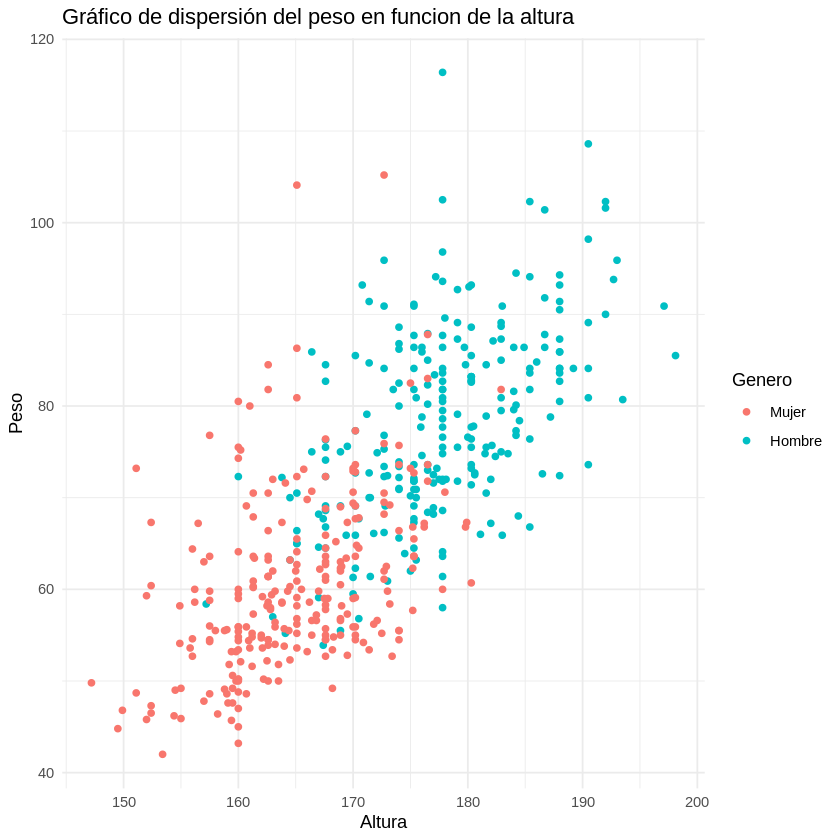

In [12]:
genero <- factor(body$GEN, levels=c(0,1), labels = c("Mujer", "Hombre"))

ggplot(body, aes(x = HEIG, y = WEIG, color = genero)) +
  geom_point() +
  labs(title = "Gráfico de dispersión del peso en funcion de la altura",
       x = "Altura",
       y = "Peso",
       color = "Genero") +
  theme_minimal()

Observamos una correlación positiva entre las variables, a medida que aumenta la altura, suele aumentar el peso.

In [13]:
cor(body$HEIG, body$WEIG)

[1] 0.7173011

Esto se corrobora a la hora de ver el coeficiente de correlación entre HEIG y WIEG, en donde vemos que tienen una correlacion superior al 70%.

## Ejercicio (d)

Añadimos las regresiones (ksmooth) hechas a los gráficos y comparamos entre hombres y mujeres.

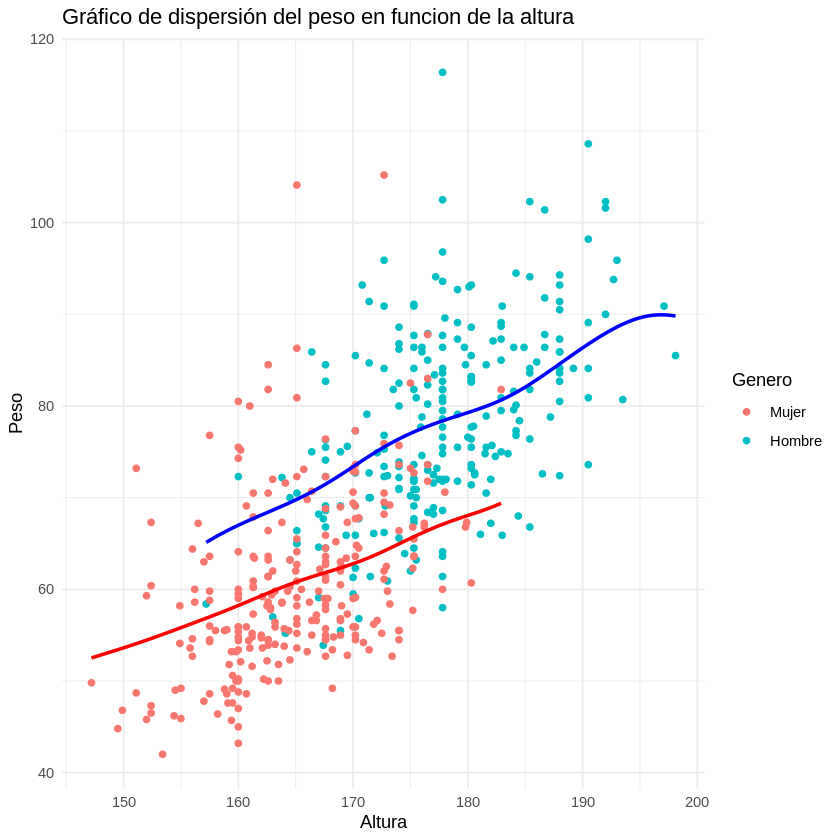

In [14]:
regresion_h <- ksmooth(body$HEIG[body$GEN == 1], body$WEIG[body$GEN == 1], kernel = "normal", bandwidth = 10)
regresion_m <- ksmooth(body$HEIG[body$GEN == 0], body$WEIG[body$GEN == 0], kernel = "normal", bandwidth = 10)


regression_df_h <- data.frame(x = regresion_h$x, y = regresion_h$y)
regression_df_m <- data.frame(x = regresion_m$x, y = regresion_m$y)

ggplot(body, aes(x = HEIG, y = WEIG, color = genero)) +
  geom_point() +
  geom_line(data = regression_df_h, aes(x = x, y = y), linetype = "solid", color = "blue", linewidth = 1) +
  geom_line(data = regression_df_m, aes(x = x, y = y), linetype = "solid", color = "red", linewidth = 1) +
  labs(title = "Gráfico de dispersión del peso en funcion de la altura",
       x = "Altura",
       y = "Peso",
       color = "Genero") +
  theme_minimal()

Las funciones obtenidas son cercanas a rectas. Creemos que una función lineal puede aproximar bien los datos, considerando la variabilidad del peso para una altura específica. Además, según lo que podemos observar, la posible "pendiente" en una recta para los hombres parece ser mayor que la de las mujeres.


## Ejercicio (e)

Para cada género, probaremos con todas las ventanas desde h = 5 hasta h = 20, con saltos de 0.5. En cada ventana, usando convalidación cruzada dejando uno afuera, calcularemos el error cuadrático medio de convalidación cruzada y seleccionaremos la ventana que minimice este error.

[1] "La ventana optima es de h = 8"
[1] "El ECM es de 81.2977144738164"


integer(0)

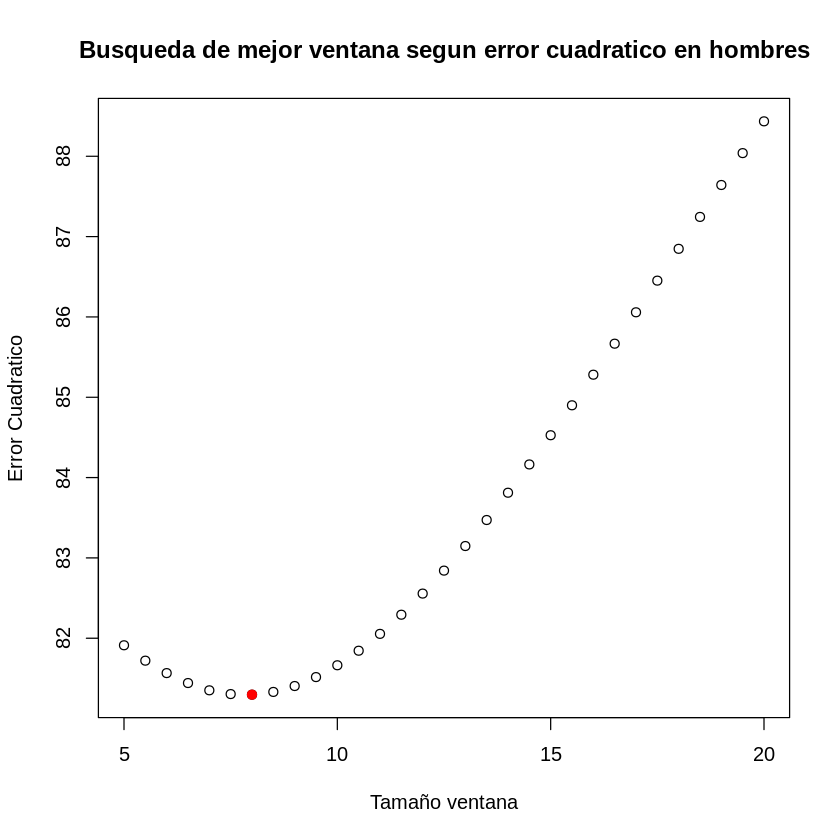

In [15]:
#Buscamos la mejor ventana para hombres
n <- length(body$HEIG[body$GEN == 1])
windows <- seq(5, 20, 0.5)
df_part <- data.frame(HEIG = body$HEIG[body$GEN == 1], WEIG = body$WEIG[body$GEN == 1])
errores_w <- c()

for (w in windows){
  tot <- 0
  for (i in 1:n){
    modelo_ajustado <- ksmooth(df_part$HEIG[-i], df_part$WEIG[-i], kernel = "normal", bandwidth = w, x.points = df_part$HEIG[i])

    tot <- tot + (df_part$WEIG[i] - modelo_ajustado$y[1])^2
  }
  errores_w <- c(errores_w , tot/n)
}

print(paste("La ventana optima es de h =", windows[which.min(errores_w)]))
print(paste("El ECM es de", min(errores_w)))

plot(windows, errores_w, main = "Busqueda de mejor ventana segun error cuadratico en hombres", xlab= "Tamaño ventana", ylab = "Error Cuadratico") +
  points(windows[which.min(errores_w)], min(errores_w), col = "red", pch = 19)

[1] "La ventana optima es de h = 8"
[1] "El ECM es de 77.7934764835347"


integer(0)

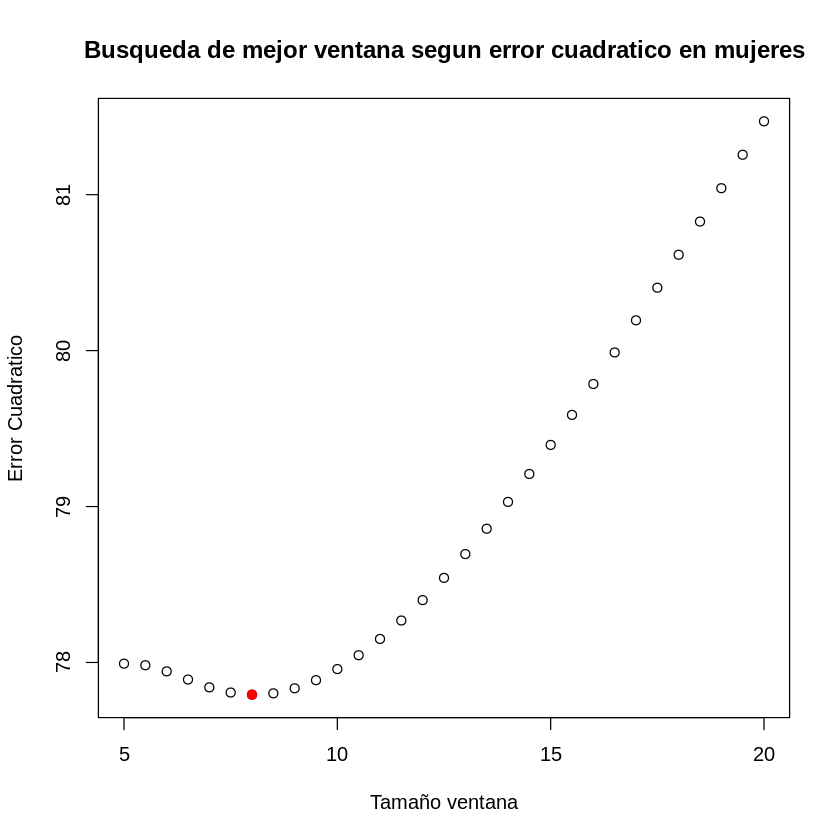

In [16]:
#Buscamos la mejor ventana para mujeres
n <- length(body$HEIG[body$GEN == 0])
windows <- seq(5, 20, 0.5)
df_part <- data.frame(HEIG = body$HEIG[body$GEN == 0], WEIG = body$WEIG[body$GEN == 0])
errores_w <- c()

for (w in windows){
  tot <- 0
  for (i in 1:n){
    modelo_ajustado <- ksmooth(df_part$HEIG[-i], df_part$WEIG[-i], kernel = "normal", bandwidth = w, x.points = df_part$HEIG[i])

    tot <- tot + (df_part$WEIG[i] - modelo_ajustado$y[1])^2
  }
  errores_w <- c(errores_w , tot/n)
}
print(paste("La ventana optima es de h =", windows[which.min(errores_w)]))
print(paste("El ECM es de", min(errores_w)))

plot(windows, errores_w, main = "Busqueda de mejor ventana segun error cuadratico en mujeres", xlab= "Tamaño ventana", ylab = "Error Cuadratico") +
  points(windows[which.min(errores_w)], min(errores_w), col = "red", pch = 19)

Para ambos géneros, la ventana óptima es de h = 8. Vemos en los 2 graficos como para todos los otros puntos el ECM es mayor y además podemos intuir que luego de h = 8, a medida que aumenta la ventana, aumenta el ECM.

## Ejercicio (f)

Comparamos el modelo no parametrico con el modelo lineal de cuadrados minimos.

[1] "El ECM del metodo de cuadrados minimos es de 78.5980508095543"


integer(0)

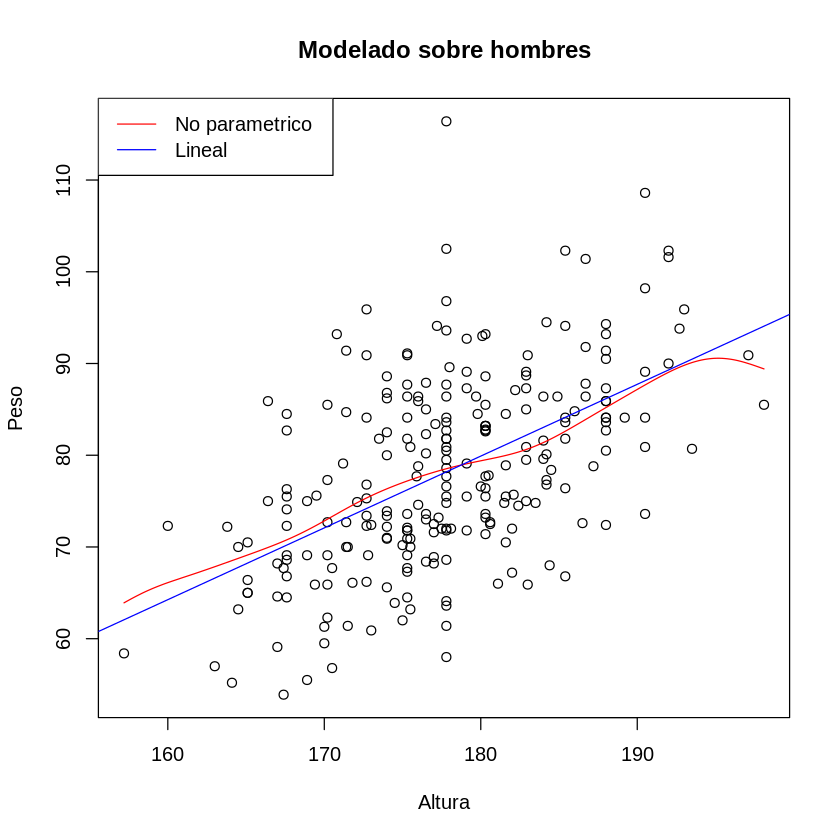

In [17]:
#Diagrama de dispersion de HEIG vs. WEIG hombres
regresion_h <- ksmooth(body$HEIG[body$GEN == 1], body$WEIG[body$GEN == 1], kernel = "normal", bandwidth = 8)
df_filter <- body[body$GEN == 1, ]

cm <- lm(WEIG ~ HEIG, data = df_filter)

predicciones <- predict(cm)
residuos <- resid(cm)
ecm <- mean(residuos^2)

print(paste("El ECM del metodo de cuadrados minimos es de", ecm))

plot(body$HEIG[body$GEN == 1], body$WEIG[body$GEN == 1], main= "Modelado sobre hombres",xlab = "Altura", ylab = "Peso")+
  lines(regresion_h, col = "red")
  abline(cm, col = "blue")
  legend("topleft", legend = c("No parametrico", "Lineal"),  col = c("red", "blue"), lty= c(1,1))

[1] "El ECM del metodo de cuadrados minimos es de  74.9916182500173"


integer(0)

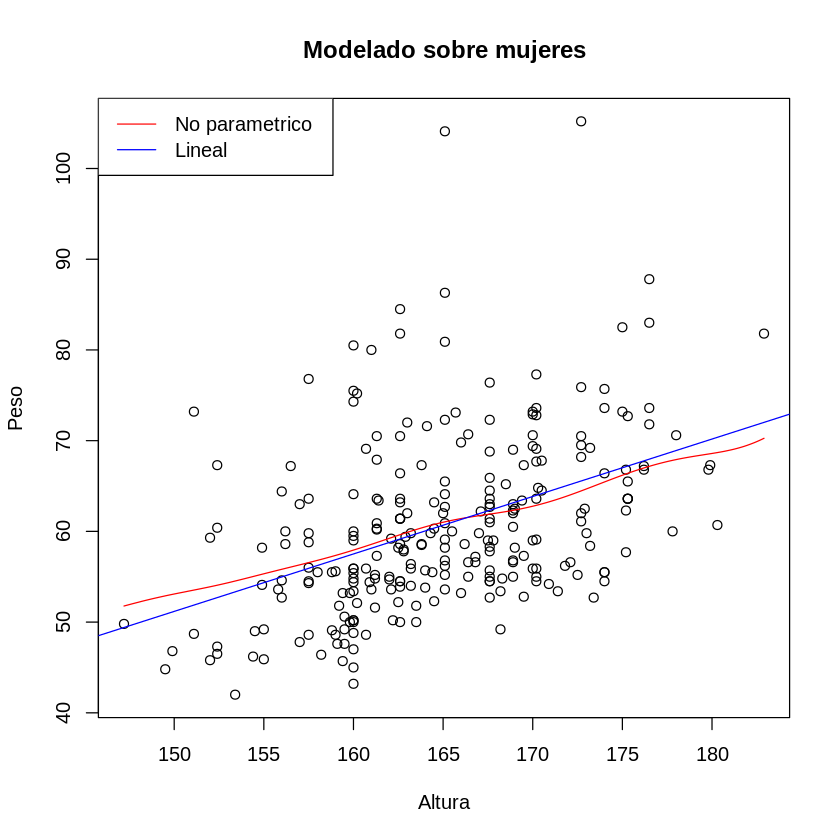

In [18]:
#Diagrama de dispersion de HEIG vs. WEIG mujeres
regresion_h <- ksmooth(body$HEIG[body$GEN == 0], body$WEIG[body$GEN == 0], kernel = "normal", bandwidth = 8)
df_filter <- body[body$GEN == 0, ]

cm <- lm(WEIG ~ HEIG, data = df_filter)

predicciones <- predict(cm)
residuos <- resid(cm)
ecm <- mean(residuos^2)

print(paste("El ECM del metodo de cuadrados minimos es de ", ecm))

plot(body$HEIG[body$GEN == 0], body$WEIG[body$GEN == 0], main= "Modelado sobre mujeres", xlab = "Altura", ylab = "Peso")+
  lines(regresion_h, col = "red")
  abline(cm, col = "blue")
  legend("topleft", legend = c("No parametrico", "Lineal"),  col = c("red", "blue"), lty= c(1,1))

Consideramos que la regresión lineal puede generalizar mejor a nuevos datos, es un modelo más simple y las curvas son similares. La regresión no paramétrica puede sobreajustar a los datos.

Además, confirmamos nuestra hipótesis inicial de que la pendiente en el caso de los hombres es mayor que en el caso de las mujeres. Esta diferencia en las pendientes indica que la altura parece tener una influencia más significativa en el peso de los hombres en comparación con las mujeres. En consecuencia, podríamos concluir que, en nuestro conjunto de datos, la relación entre altura y peso es más alta en hombres que en mujeres.

# Regresion Lineal

## Ejercicio (g)

Dividimos los datos en conjuntos de entrenamiento y testeo

In [19]:
train_test = read.csv("TrainTest.txt", header=FALSE)$V1

In [20]:
train = body[train_test,]
test = body[train_test == "FALSE",]

Ajustamos un modelo lineal para WEIG basado en todas las variables explicativas

In [21]:
modelo <- lm(WEIG ~ ., data = train)

In [22]:
resumen <- summary(modelo)
resumen


Call:
lm(formula = WEIG ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3537 -1.2563 -0.0524  1.2437  8.6171 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.212e+02  3.024e+00 -40.061  < 2e-16 ***
BIAC         8.889e-03  7.711e-02   0.115 0.908282    
BIIL         1.324e-01  7.268e-02   1.821 0.069304 .  
BITRO       -1.427e-01  1.024e-01  -1.394 0.164190    
CHEST1       3.387e-01  7.712e-02   4.392 1.45e-05 ***
CHEST2       1.223e-01  9.272e-02   1.319 0.188070    
ELBOW        2.326e-02  2.165e-01   0.107 0.914479    
WRIST        2.597e-01  2.505e-01   1.037 0.300525    
KNEE         4.609e-01  1.555e-01   2.964 0.003227 ** 
ANKLE        9.814e-02  1.812e-01   0.542 0.588279    
SHOUL        7.694e-02  3.537e-02   2.175 0.030231 *  
CHESTG       1.518e-01  4.440e-02   3.420 0.000694 ***
WAISTG       3.636e-01  3.102e-02  11.721  < 2e-16 ***
NAVEL       -2.973e-02  2.789e-02  -1.066 0.287001    
HIP          2.588e-01

En el resumen se pueden ver los p-valores junto con símbolos que indican el nivel mínimo para el cual los valores son estadísticamente significativos. Dejaríamos las variables cuyo coeficiente es significativo a nivel 0,05.

El valor del estádistico F da un p-valor de prácticamente 0. Por lo que tenemos mucha evidencia en contra de la hipótesis nula. Esto sugiere algún efecto de las variables explicativas (de al menos una) en **WEIG** y que el modelo lineal mejora al modelo constante.

La estimación de los coeficientes puede estar siendo afectada por cierta correlación entre las variables independientes.

Exploramos las correlaciones lineales entre las variables explicativas.


In [28]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




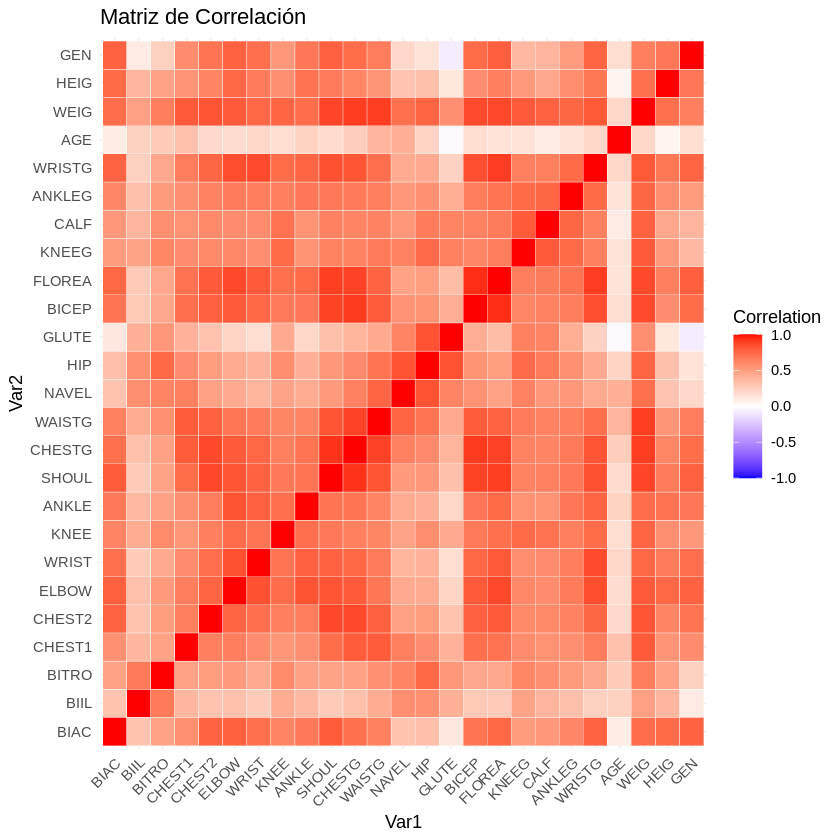

In [30]:
# Crear una matriz de correlación (reemplaza 'train' con tu conjunto de datos)
matriz_correlacion <- cor(train)

# Convertir la matriz de correlación a formato largo
matriz_correlacion_long <- as.data.frame(as.table(matriz_correlacion))
colnames(matriz_correlacion_long) <- c("Var1", "Var2", "value")

# Crear el gráfico de matriz de correlación con ggplot2
ggplot(matriz_correlacion_long, aes(Var1, Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                       midpoint = 0, limit = c(-1, 1), space = "Lab",
                       name = "Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "right") +
  labs(title = "Matriz de Correlación")


Este código es para ver qué variables están más correlacionadas, parece funcionar. El heatmap incluye a WEIG.

In [24]:
matriz_correlacion <- cor(train)

diag(matriz_correlacion) <- 0

datos_largo <- as.data.frame(as.table(matriz_correlacion))
datos_largo$Var1 <- rownames(matriz_correlacion)[datos_largo$Var1]
datos_largo$Var2 <- rownames(matriz_correlacion)[datos_largo$Var2]

datos_ordenados <- datos_largo %>% arrange(desc(abs(Freq)))

datos_ordenados <- datos_ordenados %>% filter(Freq != 0)

print(datos_ordenados)

      Var1   Var2        Freq
1   FLOREA  BICEP  0.94145952
2    BICEP FLOREA  0.94145952
3   CHESTG  SHOUL  0.92889246
4    SHOUL CHESTG  0.92889246
5    BICEP CHESTG  0.90804124
6   CHESTG  BICEP  0.90804124
7   WRISTG FLOREA  0.90325185
8   FLOREA WRISTG  0.90325185
9     WEIG CHESTG  0.90315330
10  CHESTG   WEIG  0.90315330
11    WEIG WAISTG  0.89956979
12  WAISTG   WEIG  0.89956979
13  FLOREA  SHOUL  0.89647191
14   SHOUL FLOREA  0.89647191
15   BICEP  SHOUL  0.89047862
16   SHOUL  BICEP  0.89047862
17  FLOREA CHESTG  0.88744708
18  CHESTG FLOREA  0.88744708
19  WAISTG CHESTG  0.88599110
20  CHESTG WAISTG  0.88599110
21    WEIG  SHOUL  0.87948999
22   SHOUL   WEIG  0.87948999
23   SHOUL CHEST2  0.87185706
24  CHEST2  SHOUL  0.87185706
25  CHESTG CHEST2  0.86588228
26  CHEST2 CHESTG  0.86588228
27  FLOREA  ELBOW  0.86553666
28   ELBOW FLOREA  0.86553666
29    WEIG FLOREA  0.86316917
30  FLOREA   WEIG  0.86316917
31  WRISTG  WRIST  0.86088109
32   WRIST WRISTG  0.86088109
33    WEIG

La presencia de multicolinealidad puede hacer que algunos coeficientes sean menos significantes para el modelo. Por ejemplo, el coeficiente de una variable que quizás explica mejor a la variable dependiente, podria verse opacado por la correlación directa que tiene con otra variable independiente, provocando que la que realmente influye no tenga un coeficiente significativo. Podría ocurrir que para ciertas muestras el modelo tome a distintos coeficientes como significativos.
Así, corremos el riesgo de descartar una variable importante basándonos únicamente en el p-valor.

In [25]:
predicciones = predict(modelo, newdata = test)

error_empirico = mean((test$WEIG - predicciones)^2)

print(paste("Error de predicción empírico:", error_empirico))

[1] "Error de predicción empírico: 4.22535567410202"


## Ejercicio (h)

En este ejercicio, analizaremos los p-valores de todas las variables y seleccionaremos aquellos más pequeños (menores a 0,05). Posteriormente, procederemos a eliminar algunas variables altamente correlacionadas con el objetivo de conservar únicamente aquellas que tienen un impacto significativo en el peso, que es la variable que buscamos predecir.


In [ ]:
p_values <- resumen$coefficients[, "Pr(>|t|)"]

resultados <- data.frame(variable = rownames(resumen$coefficients), p_valor = p_values)
resultados_ordenados <- resultados[order(resultados$p_valor), ]

print(resultados_ordenados)

               variable       p_valor
(Intercept) (Intercept) 6.114040e-140
HEIG               HEIG  9.965528e-39
WAISTG           WAISTG  2.279679e-27
HIP                 HIP  1.424118e-06
CALF               CALF  1.760147e-06
CHEST1           CHEST1  1.448479e-05
FLOREA           FLOREA  1.279668e-04
AGE                 AGE  1.338756e-04
GLUTE             GLUTE  3.573126e-04
CHESTG           CHESTG  6.935528e-04
KNEE               KNEE  3.226901e-03
GEN                 GEN  8.947722e-03
KNEEG             KNEEG  1.525182e-02
SHOUL             SHOUL  3.023061e-02
BIIL               BIIL  6.930415e-02
BITRO             BITRO  1.641896e-01
WRISTG           WRISTG  1.818151e-01
CHEST2           CHEST2  1.880703e-01
NAVEL             NAVEL  2.870005e-01
WRIST             WRIST  3.005254e-01
ANKLE             ANKLE  5.882791e-01
BICEP             BICEP  5.939042e-01
ANKLEG           ANKLEG  8.675193e-01
BIAC               BIAC  9.082815e-01
ELBOW             ELBOW  9.144790e-01


Nos quedaremos con las variables hasta **SHOUL**. Ahora, seleccionaremos las parejas de variables que están correlacionadas en más de un 70% , es decir, aquellas parejas en las cuales el coeficiente de correlación sea mayor a 0.7.

In [ ]:
imp_variables <- resultados_ordenados$variable[2:14]

triplas <- data.frame(v1 = character(), v2 = character(), freq = numeric())

for (v1 in imp_variables) {
  for (v2 in imp_variables) {
    if (v1 != v2) {
      freq <- datos_ordenados$Freq[datos_ordenados$Var1 == v1 & datos_ordenados$Var2 == v2]
      if (length(freq) > 0 && freq > 0.7) {
        triplas <- rbind(triplas, data.frame(v1 = v1, v2 = v2, freq = freq))
      }
    }
  }
}

triplas <- triplas[order(-triplas$freq), ]
print(triplas)

       v1     v2      freq
21 CHESTG  SHOUL 0.9288925
33  SHOUL CHESTG 0.9288925
15 FLOREA  SHOUL 0.8964719
32  SHOUL FLOREA 0.8964719
12 FLOREA CHESTG 0.8874471
19 CHESTG FLOREA 0.8874471
3  WAISTG CHESTG 0.8859911
17 CHESTG WAISTG 0.8859911
5     HIP  GLUTE 0.8348646
16  GLUTE    HIP 0.8348646
4  WAISTG  SHOUL 0.8210642
30  SHOUL WAISTG 0.8210642
7    CALF  KNEEG 0.8017555
28  KNEEG   CALF 0.8017555
1  WAISTG CHEST1 0.7963673
8  CHEST1 WAISTG 0.7963673
9  CHEST1 CHESTG 0.7946669
18 CHESTG CHEST1 0.7946669
14 FLOREA    GEN 0.7854481
24    GEN FLOREA 0.7854481
26    GEN  SHOUL 0.7759393
34  SHOUL    GEN 0.7759393
2  WAISTG FLOREA 0.7673268
11 FLOREA WAISTG 0.7673268
23   KNEE  KNEEG 0.7386101
29  KNEEG   KNEE 0.7386101
6     HIP  KNEEG 0.7347028
27  KNEEG    HIP 0.7347028
20 CHESTG    GEN 0.7285367
25    GEN CHESTG 0.7285367
10 CHEST1  SHOUL 0.7276648
31  SHOUL CHEST1 0.7276648
13 FLOREA   KNEE 0.7145097
22   KNEE FLOREA 0.7145097


Finalmente de estas parejas iremos quitando, de la sublista de variables que consideramos importantes, las menos importantes (las de mayor p-valor) hasta que no haya mas parejas correlacionados con un porcentaje mayor al 70%.

In [ ]:
variables_a_sacar <- c()
i <- 13
while(i > 1){
  n_prev <- nrow(triplas)
  triplas <- triplas[!(triplas$v1 == imp_variables[i] | triplas$v2 == imp_variables[i]),]
  if(nrow(triplas) < n_prev){
    variables_a_sacar <- c(variables_a_sacar, imp_variables[i])
  }
  i <- i-1
}

print(variables_a_sacar)

[1] "SHOUL"  "KNEEG"  "GEN"    "KNEE"   "CHESTG" "GLUTE"  "FLOREA" "CHEST1"


In [ ]:
variables_finales <- setdiff(imp_variables, variables_a_sacar)
variables_finales

[1] "HEIG"   "WAISTG" "HIP"    "CALF"   "AGE"

Entonces para predecir "WEIG", nos quedaremos con las variables:
*   'HEIG'
*   'WAISTG'
*   'HIP'
*   'CALF'
*   'AGE'

Ajustamos el modelo correspondiente y analizamos los resultados obtenidos.

In [ ]:
modelo <- lm(WEIG ~ ., data = train[c("WEIG",variables_finales)])

In [ ]:
resumen <- summary(modelo)
resumen


Call:
lm(formula = WEIG ~ ., data = train[c("WEIG", variables_finales)])

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4120 -1.8528 -0.2816  1.7895 11.5260 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -115.88090    3.54182  -32.72  < 2e-16 ***
HEIG           0.40199    0.01935   20.77  < 2e-16 ***
WAISTG         0.62799    0.02350   26.72  < 2e-16 ***
HIP            0.38398    0.03366   11.41  < 2e-16 ***
CALF           0.93813    0.07570   12.39  < 2e-16 ***
AGE           -0.10192    0.01739   -5.86 9.58e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.994 on 407 degrees of freedom
Multiple R-squared:  0.9508,	Adjusted R-squared:  0.9502 
F-statistic:  1574 on 5 and 407 DF,  p-value: < 2.2e-16


Al reducir la cantidad de variables en nuestro modelo, observamos una disminución en el coeficiente
$R^2$ , lo que indica que el modelo explica menos la variabilidad en la variable **WEIG**. Sin embargo, el coeficiente sigue siendo cercano a 1. A pesar de esta disminución, los coeficientes de las variables seleccionadas se vuelven más significativos, lo que sugiere que estas variables son más relevantes para explicar la variable de interés. Sin embargo, esta simplificación del modelo también se refleja en un aumento en la varianza residual, ya que hay menos variables para explicar la variabilidad no explicada por el modelo.

## Ejercicio (i)

In [ ]:
modelo_reg = glmnet(x = as.matrix(train[, -23]), y = train$WEIG, alpha = 1)

In [ ]:
modelo_reg$lambda

[1] 12.107193419 11.031623724 10.051604677  9.158647821  8.345018791
 [6]  7.603670321  6.928181207  6.312700683  5.751897753  5.240915009
[11]  4.775326565  4.351099714  3.964560007  3.612359423  3.291447368
[16]  2.999044256  2.732617430  2.489859229  2.268666997  2.067124874
[21]  1.883487197  1.716163386  1.563704160  1.424788993  1.298214665
[26]  1.182884853  1.077800622  0.982051786  0.894809012  0.815316645
[31]  0.742886162  0.676890202  0.616757142  0.561966138  0.512042615
[36]  0.466554160  0.425106775  0.387341460  0.352931113  0.321577685
[41]  0.293009610  0.266979444  0.243261726  0.221651025  0.201960158
[46]  0.184018575  0.167670872  0.152775454  0.139203303  0.126836865
[51]  0.115569028  0.105302194  0.095947437  0.087423731  0.079657248
[56]  0.072580718  0.066132847  0.060257787  0.054904651  0.050027073
[61]  0.045582806  0.041533355  0.037843646  0.034481721  0.031418460
[66]  0.028627331  0.026084158  0.023766913  0.021655526  0.019731709
[71]  0.017978798  0.016381611  0.014926314  0.013600301  0.012392088
[76]  0.011291209  0.010288129  0.009374160  0.008541386

In [ ]:
coef(modelo_reg)

  [[ suppressing 79 column names ‘s0’, ‘s1’, ‘s2’ ... ]]



25 x 79 sparse Matrix of class "dgCMatrix"
                                                                               
(Intercept) 69.37143 59.74210065 51.24055293 43.4878899 36.4312770 28.788554427
BIAC         .        .           .           .          .          .          
BIIL         .        .           .           .          .          .          
BITRO        .        .           .           .          .          .          
CHEST1       .        .           .           .          .          .          
CHEST2       .        .           .           .          .          .          
ELBOW        .        .           .           .          .          .          
WRIST        .        .           .           .          .          .          
KNEE         .        .           .           .          .          .          
ANKLE        .        .           .           .          .          .          
SHOUL        .        .           .           .          .          0.0014018

In [ ]:
modelo_reg


Call:  glmnet(x = as.matrix(train[, -23]), y = train$WEIG, alpha = 1) 

   Df  %Dev  Lambda
1   0  0.00 12.1100
2   2 14.36 11.0300
3   2 26.55 10.0500
4   2 36.68  9.1590
5   2 45.08  8.3450
6   5 52.43  7.6040
7   5 59.35  6.9280
8   5 65.08  6.3130
9   5 69.84  5.7520
10  5 73.80  5.2410
11  7 77.25  4.7750
12  8 80.50  4.3510
13  8 83.31  3.9650
14  8 85.64  3.6120
15  8 87.57  3.2910
16  8 89.18  2.9990
17  8 90.51  2.7330
18  9 91.62  2.4900
19 10 92.54  2.2690
20 10 93.33  2.0670
21 10 93.98  1.8830
22 11 94.52  1.7160
23 11 94.96  1.5640
24 11 95.34  1.4250
25 11 95.65  1.2980
26 12 95.95  1.1830
27 12 96.20  1.0780
28 12 96.41  0.9821
29 12 96.58  0.8948
30 12 96.72  0.8153
31 13 96.84  0.7429
32 13 96.95  0.6769
33 13 97.03  0.6168
34 13 97.10  0.5620
35 13 97.16  0.5120
36 13 97.21  0.4666
37 13 97.25  0.4251
38 13 97.28  0.3873
39 12 97.31  0.3529
40 14 97.34  0.3216
41 14 97.38  0.2930
42 15 97.41  0.2670
43 15 97.44  0.2433
44 15 97.46  0.2217
45 15 97.48  0.2020
46 15 9

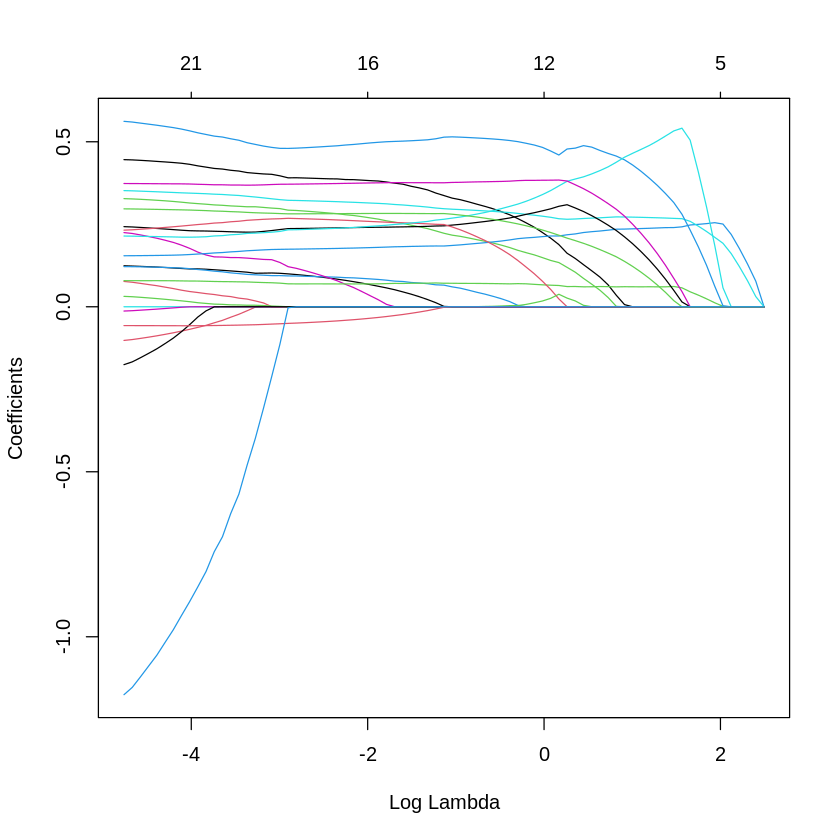

In [ ]:
plot(modelo_reg, xvar="lambda")

Las líneas representan a cada coeficiente. A medida que el lambda aumenta, los coeficientes deben ser más chicos por la función a minimizar. El eje de arriba representa la columna Df, que es la cantidad de variables no nulas para el lambda correspondiente.

## Ejercicio (j)

Buscamos el lambda óptimo

In [ ]:
cvfit = cv.glmnet(x = as.matrix(train[, -23]), y = train$WEIG, alpha = 1)

In [ ]:
cvfit


Call:  cv.glmnet(x = as.matrix(train[, -23]), y = train$WEIG, alpha = 1) 

Measure: Mean-Squared Error 

    Lambda Index Measure     SE Nonzero
min 0.0661    57   4.941 0.5568      16
1se 0.3873    38   5.456 0.7054      13

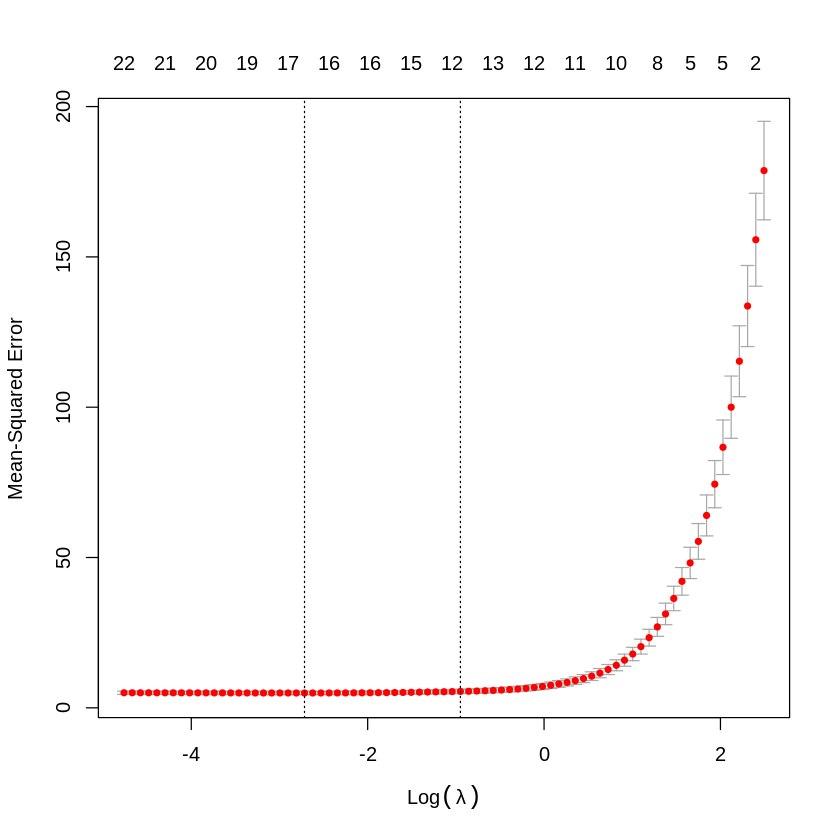

In [ ]:
plot(cvfit)

La función nos devuelve el lambda óptimo y el lambda usando el criterio de 1 desvío estándar.

In [ ]:
lambda_opt = cvfit$lambda.min
lambda_1_desvio = cvfit$lambda.1se

In [ ]:
lambda_opt

[1] 0.06613285

In [ ]:
lambda_1_desvio

[1] 0.3873415

In [ ]:
modelo_reg_nuevo = glmnet(x = as.matrix(train[, -23]), y = train$WEIG, alpha = 1, lambda=lambda_1_desvio)

In [ ]:
coef(modelo_reg_nuevo)

25 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept) -1.121828e+02
BIAC         .           
BIIL         .           
BITRO        .           
CHEST1       2.118038e-01
CHEST2       5.596989e-02
ELBOW        .           
WRIST        .           
KNEE         3.263107e-01
ANKLE        .           
SHOUL        7.237777e-02
CHESTG       1.865753e-01
WAISTG       2.959807e-01
NAVEL        .           
HIP          2.471618e-01
GLUTE        2.367370e-01
BICEP        1.290293e-03
FLOREA       5.113207e-01
KNEEG        2.734549e-01
CALF         3.734309e-01
ANKLEG       .           
WRISTG       .           
AGE          .           
HEIG         2.777312e-01
GEN          .           

Los coeficientes que el modelo conserva, tienen en general la misma magnitud. El modelo regularizado fuerza a que muchos coeficientes se vuelvan nulos. En el caso del modelo sin regularizar, todos los coeficientes son no nulos.

In [ ]:
predicciones_reg = predict(modelo_reg_nuevo, newx = as.matrix(test[, -23]))

error_empirico_reg = mean((test$WEIG - predicciones_reg)^2)

print(paste("Error de predicción empírico:", error_empirico_reg))

[1] "Error de predicción empírico: 4.34511425960671"


El error de predicción empírico usando el lambda de 1 desvío es mayor.

In [ ]:
predicciones_reg = predict(modelo_reg, newx = as.matrix(test[, -23]), s=c(lambda_opt))

error_empirico_reg = mean((test$WEIG - predicciones_reg)^2)

print(paste("Error de predicción empírico:", error_empirico_reg))

[1] "Error de predicción empírico: 4.14486143658458"


Este es con el lambda óptimo

## Ejercicio (k)

En el ejercicio (h), aunque las variables se vuelven más significativas, el modelo se vuelve mucho más simple. Además la significación de los coeficientes de variables correlacionadas puede variar según los datos por lo que este criterio no es infalible y alguna variable que explique mejor la relación puede haber quedado afuera.

En el ejercicio (j), el error de predicción empírico es más alto usando el lambda de 1 desvío. El modelo no regularizado predice mejor sobre el conjunto de testeo. En este caso, el criterio no parece generalizar mejor. Puede que si tuviéramos más datos esto mejorara.
Por último pudimos ver que con el lambda óptimo sí bajó el error en el conjunto de testeo.